# Exercise 5.04: Breast Cancer Diagnosis Classification using Logistic Regression (with Answers)

In this activity we will be using the Breast Cancer dataset [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)]( https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) ) available under the [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/index.php).  The dataset contains characteristics of the cell nuclei present in the digitized image of a fine needle aspirate (FNA) of a breast mass, with the labels _malignant_ and _benign_ for each cell nucleus. Throughout this activity we will use the measurements provided in the dataset to classify between malignant and benign cells.

## Import the Required Packages
For this exercise we will require the Pandas package for loading the data, the matplotlib package for plotting as well as scikit-learn for creating the Logistic Regression model, doing some feature selection as well as model selection.  Import all of the required packages and relevant modules for these tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

## Load the Data
Load the Breast Cancer Diagnosis dataset using Pandas and examine the first 5 rows

In [2]:
df = pd.read_csv('../Datasets/breast-cancer-data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Dissect the data into input (X) and output (y) variables

In [3]:
X, y = df[[c for c in df.columns if c != 'diagnosis']], df.diagnosis

## Feature Engineering
We need to select the most appropriate features that will provide the most powerful classification model.  We will use scikit-learn's select K best features sub-module under its feature selection module. Basically it examines the power of each feature against the target output based on a scoring function. You may read about the details here : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [4]:
# restricting to 2 best features so that we can visualize them on a plot
skb_model = SelectKBest(k=2)
X_new = skb_model.fit_transform(X, y)

# get the k - best column names
mask = skb_model.get_support() #list of booleans
selected_features = [] # The list of your K best features

for bool, feature in zip(mask, df.columns):
    if bool:
        selected_features.append(feature)
print(selected_features)

['worst perimeter', 'worst concave points']


Let us visualize how these 2 most important features correlate with the target (diagnosis) and how well do they separate the 2 classes of diagnosis.

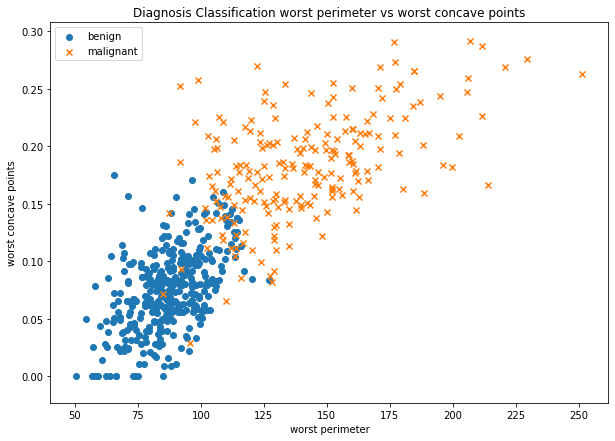

In [5]:
markers = {
    'benign': {'marker': 'o'},
    'malignant': {'marker': 'x'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group[selected_features[0]], group[selected_features[1]], 
                label=name,
                marker=markers[name]['marker'],
               )
    
plt.title(f'Diagnosis Classification {selected_features[0]} vs {selected_features[1]}');
plt.xlabel(selected_features[0]);
plt.ylabel(selected_features[1]);
plt.legend();


## Constructing the Logistic Regression Model
Before we can construct the model we must first convert the dignosis values into labels that can be used within the model.  Replace:

1. The diagnosis string *benign* with the value 0
2. The diagnosis string *malignant* with the value 1

In [6]:
diagnoses = [
    'benign', # 0
    'malignant', # 1
]
output = [diagnoses.index(diag) for diag in df.diagnosis]

Also, in order to impartially evaluate the model, we should split the training dataset into a training and a validation set.

In [7]:
train_X, valid_X, train_y, valid_y = train_test_split(df[selected_features], output, 
                                                      test_size=0.2, random_state=123)

Create the model using the *selected_features* and the assigned *diagnosis* labels

In [8]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Compute the accuracy of the model against the validation set:

In [9]:
model.score(valid_X, valid_y)

0.9385964912280702

Construct another model using a random choice of *selected_features* and compare the performance:

In [10]:
selected_features = [
    'mean radius', # List features here
    'mean texture',
    'compactness error'
]

train_X, valid_X, train_y, valid_y = train_test_split(df[selected_features], output, 
                                                      test_size=0.2, random_state=123)

model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)

model.score(valid_X, valid_y)

0.8859649122807017

This reduced accuracy shows that indeed using the 2 most important features renders a more powerful model than using 3 randomly chosen features.

Construct another model using all available information and compare the performance:

In [11]:
selected_features = [
    feat for feat in df.columns if feat != 'diagnosis' # List features here
]

train_X, valid_X, train_y, valid_y = train_test_split(df[selected_features], output, 
                                                      test_size=0.2, random_state=123)

model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)

model.score(valid_X, valid_y)

0.9824561403508771

This improvement in performance by using all features shows that even the features that are not among the most important features do still play a role in improving model performance.